In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-world-university-rankings-2011-2023/2017_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2020_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2023_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2015_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2018_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2022_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2012_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2013_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2014_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2016_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2021_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2011_rankings.csv
/kaggle/input/the-world-university-rankings-2011-2023/2019_rankings.csv


In [2]:
df11 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2011_rankings.csv")
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         200 non-null    int64  
 1   rank                               200 non-null    int64  
 2   name                               200 non-null    object 
 3   scores_overall                     200 non-null    float64
 4   scores_overall_rank                200 non-null    int64  
 5   scores_teaching                    200 non-null    float64
 6   scores_teaching_rank               200 non-null    int64  
 7   scores_international_outlook       200 non-null    object 
 8   scores_international_outlook_rank  200 non-null    int64  
 9   scores_industry_income             200 non-null    object 
 10  scores_industry_income_rank        200 non-null    int64  
 11  scores_research                    200 non-null    float64

In [3]:
df11['location'].value_counts()

United States     72
United Kingdom    29
Germany           14
Netherlands       10
Canada             9
Australia          7
China              6
Sweden             6
Switzerland        6
Japan              5
South Korea        4
France             4
Hong Kong          4
Taiwan             4
Denmark            3
Spain              2
Belgium            2
Ireland            2
Turkey             2
Singapore          2
Austria            2
South Africa       1
Finland            1
Norway             1
New Zealand        1
Egypt              1
Name: location, dtype: int64

<AxesSubplot:>

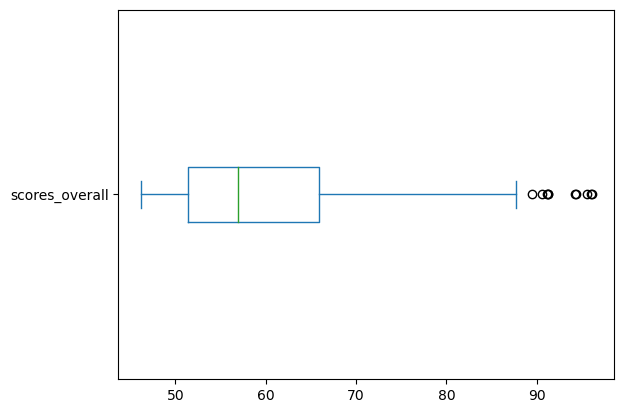

In [4]:
df11['scores_overall'].plot(kind='box', vert=False)

In [5]:
df11.describe()

,rank_order,rank,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook_rank,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.190000,100.190000,60.429500,100.500000,54.756500,100.500000,100.500000,100.500000,55.457500,100.500000,71.589500,100.500000
std,57.779462,57.779462,12.207386,57.879185,14.613677,57.879185,57.879185,57.879185,16.251047,57.879185,17.077039,57.879185
min,1.000000,1.000000,46.200000,1.000000,29.500000,1.000000,1.000000,1.000000,28.000000,1.000000,29.000000,1.000000
25%,50.500000,50.500000,51.375000,50.750000,44.550000,50.750000,50.750000,50.750000,44.100000,50.750000,59.050000,50.750000
50%,100.500000,100.500000,56.950000,100.500000,51.450000,100.500000,100.500000,100.500000,51.050000,100.500000,71.350000,100.500000
75%,149.500000,149.500000,65.925000,150.250000,62.325000,150.250000,150.250000,150.250000,62.600000,150.250000,84.475000,150.250000
max,199.000000,199.000000,96.100000,200.000000,99.700000,200.000000,200.000000,200.000000,99.300000,200.000000,99.900000,200.000000


In [6]:
df11['aliases']

0                                     Harvard University
1             California Institute of Technology caltech
2                  Massachusetts Institute of Technology
3                                    Stanford University
4                                   Princeton University
                             ...                        
195                                Kent State University
196                       University of Illinois Chicago
197    Zhejiang University ZJU Zhejiang University Ch...
198                              Simon Fraser University
199          Swedish University of Agricultural Sciences
Name: aliases, Length: 200, dtype: object

In [7]:
df23 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2023_rankings.csv")
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2345 non-null   int64  
 1   rank                               2345 non-null   object 
 2   name                               2345 non-null   object 
 3   scores_overall                     1799 non-null   object 
 4   scores_overall_rank                2345 non-null   int64  
 5   scores_teaching                    1799 non-null   float64
 6   scores_teaching_rank               2345 non-null   int64  
 7   scores_research                    1799 non-null   float64
 8   scores_research_rank               2345 non-null   int64  
 9   scores_citations                   1799 non-null   float64
 10  scores_citations_rank              2345 non-null   int64  
 11  scores_industry_income             1799 non-null   float

In [8]:
subdf23 = df23[['name','stats_number_students','stats_student_staff_ratio','stats_pc_intl_students','stats_female_male_ratio']] 
subdf23.head()

,name,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
0,University of Oxford,"20,965",10.6,42%,48 : 52
1,Harvard University,"21,887",9.6,25%,50 : 50
2,University of Cambridge,"20,185",11.3,39%,47 : 53
3,Stanford University,"16,164",7.1,24%,46 : 54
4,Massachusetts Institute of Technology,"11,415",8.2,33%,40 : 60


In [9]:
# load the datasets of top university
df22 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2022_rankings.csv")
df21 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2021_rankings.csv")
df20 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2020_rankings.csv")
df19 = pd.read_csv("/kaggle/input/the-world-university-rankings-2011-2023/2019_rankings.csv")

In [10]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2112 non-null   int64  
 1   rank                               2112 non-null   object 
 2   name                               2112 non-null   object 
 3   scores_overall                     1662 non-null   object 
 4   scores_overall_rank                2112 non-null   int64  
 5   scores_teaching                    1662 non-null   float64
 6   scores_teaching_rank               2112 non-null   int64  
 7   scores_research                    1662 non-null   float64
 8   scores_research_rank               2112 non-null   int64  
 9   scores_citations                   1662 non-null   float64
 10  scores_citations_rank              2112 non-null   int64  
 11  scores_industry_income             1662 non-null   float

In [11]:
df23['location'].value_counts()[:10]

United States         179
United Kingdom        163
Japan                 152
Russian Federation    103
India                 101
China                  95
Turkey                 80
Brazil                 73
Iran                   67
Spain                  59
Name: location, dtype: int64

### Viz ideas

1. Top Uni rankings over a period of past 5 years
2. Top Uni with rankings change in over past 5 years in all measures
3. radar chart of of scores by individual uni.
4. University students count over a period a last 5 years
5. scatter plot of T&R rankings with number of students 

- Switch to ploty for 1st and 2nd chart

### 1. Top university ranking over past 5 years

In [12]:
def ranking_by_year(df, year):
    rank_df = df[['name','rank']][:10]
    rank_df['year'] = year
    return rank_df

rank_19df = ranking_by_year(df19, 2019)
rank_20df = ranking_by_year(df20, 2020)
rank_21df = ranking_by_year(df21, 2021)
rank_22df = ranking_by_year(df22, 2022)
rank_23df = ranking_by_year(df23, 2023)

combined_df = pd.concat([rank_19df,rank_20df,rank_21df,rank_22df,rank_23df])
combined_df['rank'] = combined_df['rank'].apply(lambda x: "".join([re.sub('^=', '', s) for s in x]))
combined_df['year'] = combined_df['year'].astype('int64')

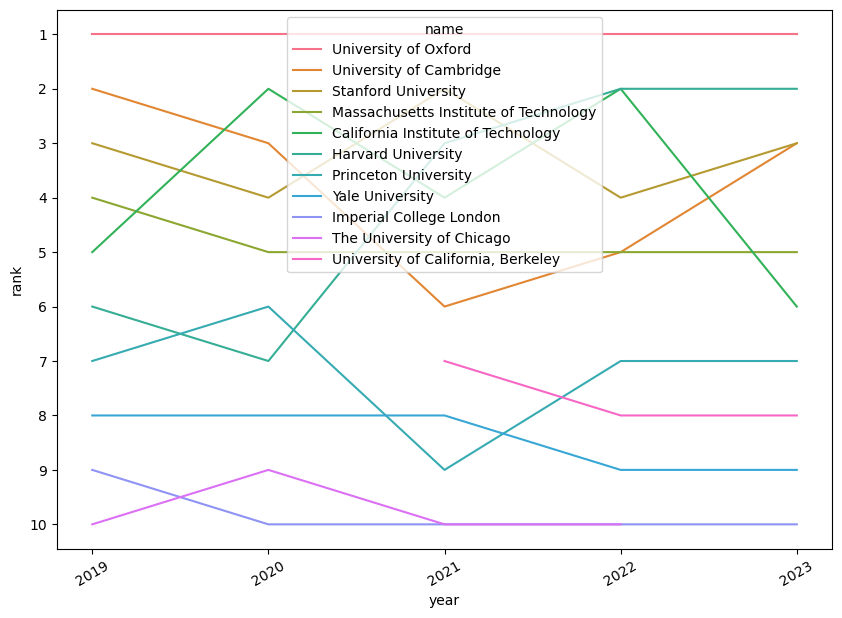

In [13]:
# plot the the rankings of each over past 5 years
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='rank', hue='name', data=combined_df)
plt.xticks(ticks=[2019,2020,2021,2022,2023], rotation=30)
plt.show()

### 2. Top university teaching and research scores over a past 5 years 

In [14]:
def tr_score(df, year):
    score_df = df[['name','scores_teaching','scores_research']][:10]
    score_df["year"] = year
    return score_df

scores_df19 = tr_score(df19, 2019)
scores_df20 = tr_score(df20, 2020)
scores_df21 = tr_score(df21, 2021)
scores_df22 = tr_score(df22, 2022)
scores_df23 = tr_score(df23, 2023)

# combined dataframes for data viz
combined_score_df = pd.concat([scores_df19,scores_df20,scores_df21,scores_df22,scores_df23])

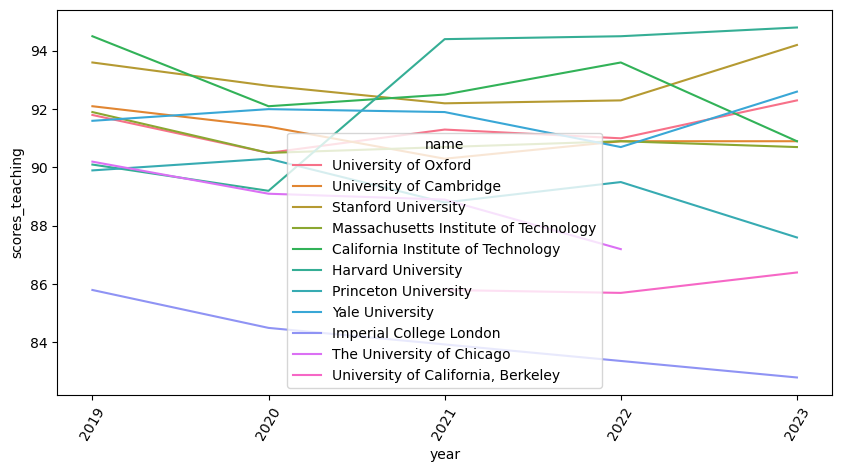

In [15]:
# plot the viz
plt.figure(figsize=(10,5))
sns.lineplot(x='year', 
             y='scores_teaching', 
             hue='name', 
             data=combined_score_df,
             legend='full',
             markers=True
             )
plt.xticks(ticks=[2019,2020,2021,2022,2023], rotation=60)
plt.show()

### 3. Radar charts of University and their scores

In [16]:
df23[['name','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']].head()

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook
0,University of Oxford,92.3,99.7,99.0,74.9,96.2
1,Harvard University,94.8,99.0,99.3,49.5,80.5
2,University of Cambridge,90.9,99.5,97.0,54.2,95.8
3,Stanford University,94.2,96.7,99.8,65.0,79.8
4,Massachusetts Institute of Technology,90.7,93.6,99.8,90.9,89.3


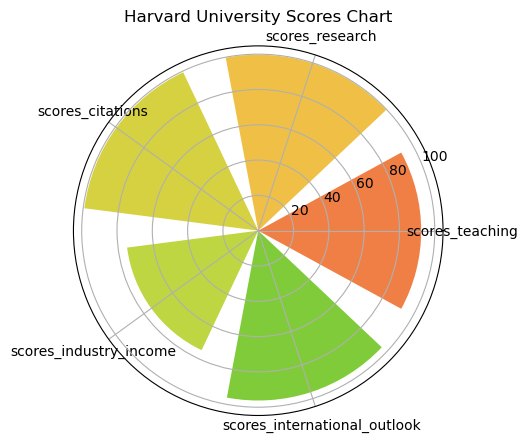

In [17]:
# Define the variables and their values for each category
categories = ['scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']
values = [92.3,99.7,99.3,74.9,96.2]
width = [1,1,1,1,1]
colors = ['#ed5f18','#edb118','#ccc612','#adcc12','#60bf08']

# Create an array of angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Create a figure and polar axes
ax = plt.subplot(projection='polar')
ax.bar(angles, values, width=width, bottom=0.0, alpha=0.8, color=colors)
ax.set_thetagrids(angles * 180/np.pi, categories)
plt.title("Harvard University Scores Chart")
# Show the plot
plt.show()

### 4. How many students TOP Universities have had over period of last 5 years

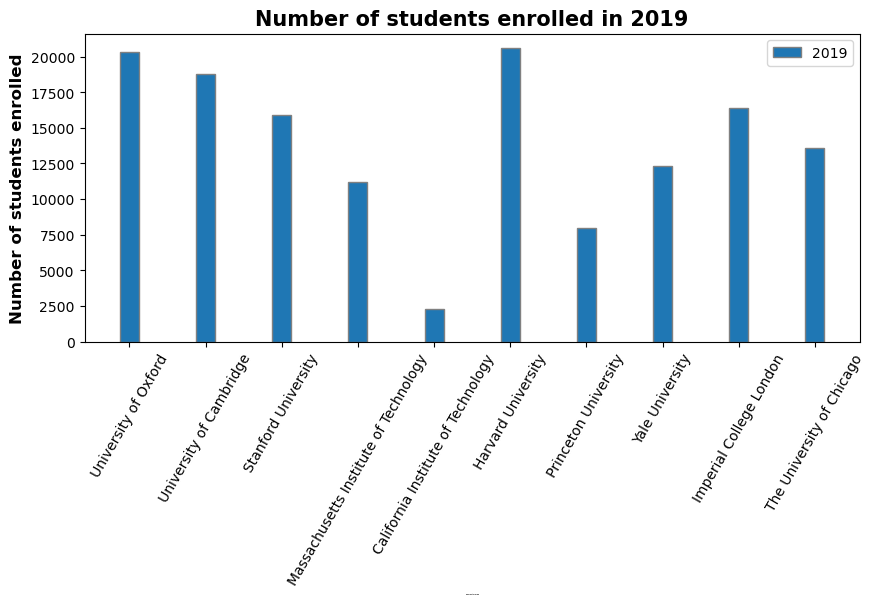

In [18]:
def students_count(df, year):
    studentdf = df[['name','stats_number_students']][:10]
    studentdf["year"] = year
    studentdf['stats_number_students'] = studentdf['stats_number_students'].str.replace(',','').astype("int64")
    return studentdf

student19 = students_count(df19, 2019)
student20 = students_count(df20, 2020)
student21 = students_count(df21, 2021)
student22 = students_count(df22, 2022)
student23 = students_count(df23, 2023)

# plot the figure
plt.figure(figsize=(10,4))
plt.bar(x=student19['name'], height=student19['stats_number_students'], width=0.25, edgecolor='grey', label=2019)
plt.xlabel('University name', fontweight ='bold', fontsize = 1)
plt.ylabel('Number of students enrolled', fontweight ='bold', fontsize = 12)
plt.xticks(rotation=60)
plt.legend()
plt.title("Number of students enrolled in 2019",fontweight ='bold', fontsize = 15)
plt.show()

### 5. Let's look at the relation between Teaching and Ranking of the university with number of students

In [19]:
def tr_relationsdf(df, year):
    trdf = df[['name','scores_teaching','scores_research','stats_number_students','stats_student_staff_ratio']][:20]
    trdf["year"] = year
    trdf['stats_number_students'] = trdf['stats_number_students'].str.replace(',','').astype("int64")
    return trdf

tr19 = tr_relationsdf(df19, 2019)
tr20 = tr_relationsdf(df20, 2020)
tr21 = tr_relationsdf(df21, 2021)
tr22 = tr_relationsdf(df22, 2022)
tr23 = tr_relationsdf(df23, 2023)

# plot the chart
fig = px.scatter(tr19, 
                 x="scores_research", 
                 y="scores_teaching", 
                 color="stats_student_staff_ratio",
                 size='stats_number_students', 
                 hover_data=['name'],
                 title='How teaching and research relate with Students and staff?')

fig.update_layout(
    title_font_family="Sitka Small",
    title_font_color="green",
    title_font_size=22)
fig.show()